### **Telecom Churn Prediction**

[Sumber data Telecom Churn Prediction](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Telecommunication company is a company that provides infrastructure for people to communicate through electronic transmission. People could subscribe to different plan offered by each telecommunication provider such as internet connection, messaging, telephone, etc. With the development of technology in each sector, connectivity is more needed than ever and telecomunication company played a big role in this information era.  

Target :

0 : Customer churn

1 : Customer doesn't churn


**Problem Statement**

As telecomunication developed and gives profit to shareholder, new entrants and competitors has emerge within the incumbent. In order for the company to deliver a great service with competitive price, it needs to be cost effective in every way. One of the way to be cost effective is to retain customers and prevent customer churning. As what [Harvard Business Review](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers#:~:text=Depending%20on%20which%20study%20you,the%20one%20you%20have%20happy) shows that acquiring new customers are more costly than retaining existing ones. 

**Goals**

A Telecomunication company has possessed data which contains it's customer's details and their usage history. With the data available, the company wanted to obtain value from it by processing it to get insights and predictive models for its uses. The predictive model will be built to predict customer probability of churning.

**Analytic Approach**

The data will be analyze to obtain pattern that differentiate between customers who will remain and customer who will churn. 

Then we will build a classification model that will help the company that will predict the probability of a customer churn.

### **Data Understanding**

**Attributes Information**

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| customerID | Object | Customer ID |
| gender | Object | Whether the customer is a male or a female |
| SeniorCitizen | Integer | Whether the customer is a senuior citizen or not (1,0) |
| Partner | Object | Whether the customer has a partner or not (Yes, No) |
| Dependents | Object | Whether the csutomer has dependendents or not (Yes, No) |
| tenure | Integer | Number of months customer has stayed with the company |
| PhoneService | Object | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Object | Whether the cutomer has multiple lines or not (Yes, No) |
| InternetService | Object | Customer's internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Object | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Object | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Object | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Object | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Object | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Object | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Object | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Object | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Object | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Float | The amount charged to the customer monthly |
| TotalCharges | Object | The total amount charged to the customer |
| Churn | Object | Whether the customer churned or not (Yes or No) |
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV,  KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer # digunakan untuk cek missing Value
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.ensemble import AdaBoostClassifier,  GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('Telco Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
TelcoChurnDesc = []
for i in df.columns:
    TelcoChurnDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(TelcoChurnDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,object,0,0.0,7043,"[1335-MXCSE, 0524-IAVZO]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[1, 0]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[66, 20]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, No]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
pd.crosstab(df['Churn'],columns='Persentase Churn',normalize=True)*100 # Balance karena perbandingan dibawah 80%

col_0,Persentase Churn
Churn,
No,73.463013
Yes,26.536987


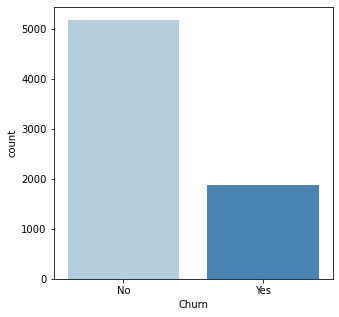

In [7]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'], palette ='Blues', linewidth = 1)
plt.show()

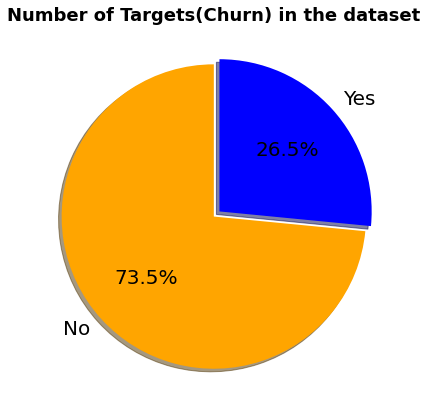

In [8]:
plt.figure(figsize=(7,7))
plt.title("Number of Targets(Churn) in the dataset", size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.05), labels=['No', 'Yes'], colors=["orange","blue"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking Missing Value

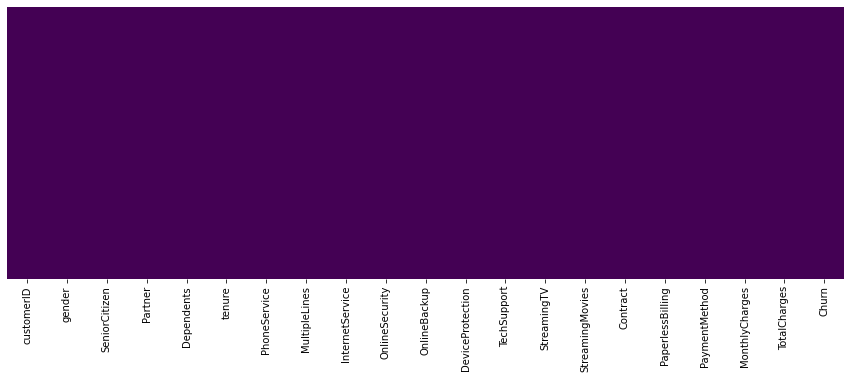

In [10]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()

In [11]:
df=df[df['TotalCharges']!=' ']

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'ignore')

In [13]:
11/7043*100 # Di drop baris 

0.1561834445548772

In [14]:
def cek_outliers(tabel,col):
    Q1 = tabel[col].describe()['25%']
    Q3 = tabel[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [15]:
cek_outliers(df,'MonthlyCharges')

'No Outliers'

In [16]:
cek_outliers(df,'tenure')

'No Outliers'

In [17]:
cek_outliers(df,'TotalCharges')

'No Outliers'

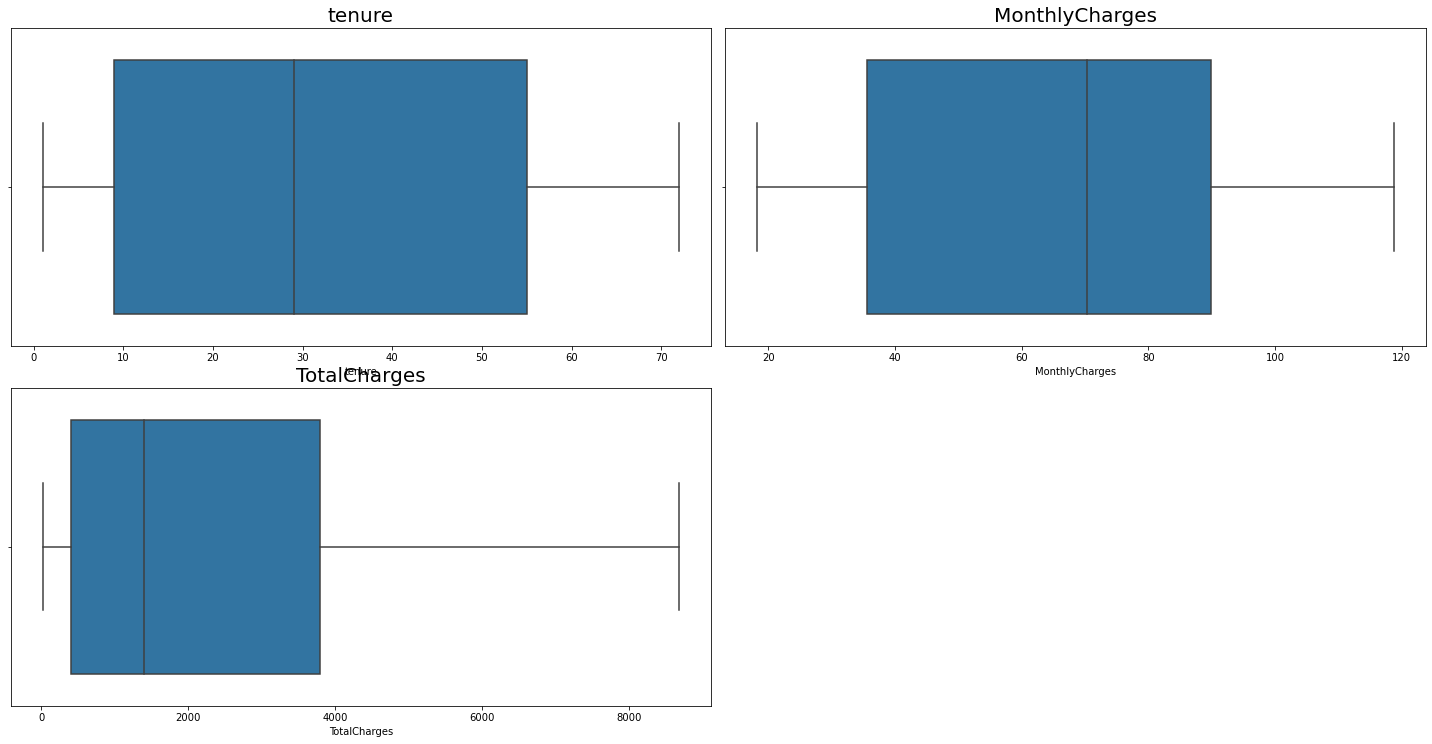

In [18]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    sns.boxplot(df[i])
    fig.tight_layout()
    plt.title(i,fontsize=20)

plt.show()

In [29]:
# TARGET VALUES
df['Churn'] = df['Churn'].map({'Yes': 1, 'No':0})

In [30]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'] 

# Data Splitting and Train-Test Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .20, random_state = 42) 
#.20 adalah 20 % untuk test , 80% untuk training. 
# random state adalah angka untuk melakukan random. jadi angkanya tidak akan berubah

Spliting data dilakukan untuk membagi jumlah data yang ingin di training dan testing. pada pengujian data kali ini saya membagi 20% data untuk melakukan testing dan 80% untuk training. 

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 1413 to 1505
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   object 
 3   Dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   object 
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   object 
 16  PaymentMethod     5625 non-null   objec

# PIPELINE

Data is being processed through Pipeline, in order to simplify the process and avoid data leakage. 

First of all the data is grouped into numerical and categorical pipeline based on it's type of data as these two types of data will be treated differently. 
Numbers that goes through numerical pipeline where missing value will be filled with it's mean and all the numbers are scaled using robust scaler where it is scaled based on its quantile range. Categorical type of data's missing value will be filled with its mode / most frequent and they will be encoded using one hot encoder.

Last, it will go to the algorithm pipeline. There are three algorithm that will be used: KNN, Random Forest, XGBoost, and Logistic Regression.

Fungsi dari pipeline pada pengujian kali ini adalah untuk menghindari data leakage atau kebocoran data. Yang dimaksud data Leakage atau kebocoran data adalah kondisi dimana model sudah melihat data test, padahal seharusnya model hanya boleh melihat data train. Kesimpulan dari PipeLine adalah agar data tidak menghafal dari hasil data train sebelum-sebelumnya

# KNN

KNN algorithm is one of the algorithm used in classification that are based on the attributes and samples from training data. KNN uses neighborhood classification as a prediction value from new instance. Classification instance that is done based on the majority from nearest neighbors category.

Source : Fundamental Python For Machine Learning (Dasar-Dasar Pemrograman Python untuk Machine Learning dan Kecerdasan Buatan)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']  

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()) 
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) 
])


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns), 
    ('categoric', categoric_pipeline, cat_columns),
])


pipe_KNN = Pipeline([ 
    ('prep', preprocessor), 
    ('algo', KNeighborsClassifier()) 
])

# Predict Training (KNN)

In [35]:
knn_train = pipe_KNN.fit(X_train, y_train) 

In [36]:
z = knn_train.predict(X_train)

In [37]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4130
           1       0.72      0.65      0.69      1495

    accuracy                           0.84      5625
   macro avg       0.80      0.78      0.79      5625
weighted avg       0.84      0.84      0.84      5625



# Predict Test (KNN)

In [38]:
y_knn = pipe_KNN.predict(X_test)

In [39]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



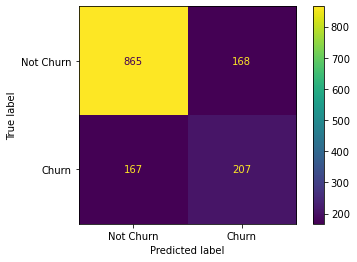

In [40]:
plot_confusion_matrix(pipe_KNN, X_test, y_test, display_labels=['Not Churn', 'Churn'])

Confusion Matrix : Confusion matrix are used to measure binary classification and multiclass classification. Binary classification only results in two output class (label), "Yes" and "No", or "0" and "1" for every data input given.

digunakan untuk mengukur performa dalam permasalahan klasifikasi biner maupun permasalahan klasifikasi multiclass. Klasifikasi biner hanya menghasilkan dua ouput kelas (label), seperti “Ya” atau “Tidak”, “0” atau “1” untuk setiap data input yang diberikan.

# HYPER PARAMETER TUNING (KNN)

Hyperparameter tuning is parameter value used to improve learning algorithm. Hyperparameter identify which tuple parameters will produce optimal model. To further improve our KNN model, Hyperparameter tuning will be performed. In this K-nearest neighbors we will use K = parameter which are the amount of neighbors that can be adjusted. 

Hyperparameter tuning adalah nilai untuk parameter yang digunakan untuk mempengaruhi proses pembelajaran. Hyperparameter melakukan proses identifikasi tuple hyperparameters yang menghasilkan model optimal yang meminimalkan fungsi kerugian yang telah ditentukan pada data independen yang disediakan. Hyper parameter tuning pada knn digunakan untuk menentukan data yang optimal dengan menggunakan model knn dengan tujuan meminimalkan fungsi kerugian. Untuk model k-nearest neighbours kita mengenal hyperparameter k = banyaknya tetangga data yang diperhatikan dalam memetakan input.

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [41]:
param_KNN = {
    'algo__n_neighbors' : np.arange(1, 1000, 10), 
    'algo__weights': ['uniform','distance'], 
    'algo__p' : [1,2]  
}

In [42]:
np.arange(1, 1000, 10)

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])

In [43]:
skf = StratifiedKFold(n_splits=4) # Cross validation , untuk mngetahui kestabilan data

In [44]:
GSS_KNN = GridSearchCV(pipe_KNN, param_KNN, cv = skf, n_jobs=-1, verbose=1)

In [45]:
GSS_KNN.fit(X_train, y_train)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
            

In [46]:
KNN_Tuned = GSS_KNN.best_estimator_

In [47]:
y_ts_KNN = KNN_Tuned.predict(X_test)

### Classification Report KNN

In [48]:
print(classification_report(y_test, y_ts_KNN))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



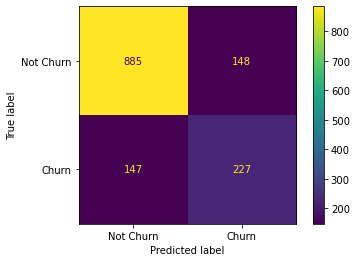

In [49]:
plot_confusion_matrix(KNN_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'])

# Random Forest

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

Source : https://www.javatpoint.com/machine-learning-random-forest-algorithm

In [50]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
])


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
])


pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

In [51]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                            

### Predict Training (Random Forest)

In [52]:
RF_train = pipe_KNN.fit(X_train, y_train) 

In [53]:
z = RF_train.predict(X_train)

In [54]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4130
           1       0.72      0.65      0.69      1495

    accuracy                           0.84      5625
   macro avg       0.80      0.78      0.79      5625
weighted avg       0.84      0.84      0.84      5625



### Predict Test (Random Forest)

In [55]:
y_RF = pipe_RF.predict(X_test)

In [56]:
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



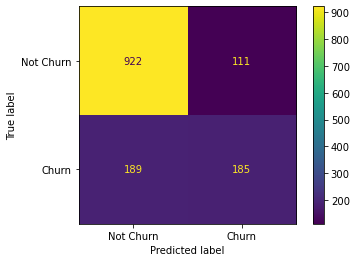

In [57]:
plot_confusion_matrix(pipe_RF, X_test, y_test, display_labels=['Not Churn', 'Churn'])

# Hyper Parameter Tuning (Random Forest)

Hyperparameter tuning adalah nilai untuk parameter yang digunakan untuk mempengaruhi proses pembelajaran. Hyperparameter melakukan proses identifikasi tuple hyperparameters yang menghasilkan model optimal yang meminimalkan fungsi kerugian yang telah ditentukan pada data independen yang disediakan. Hyper parameter tuning pada Random Forest digunakan untuk menentukan data yang optimal dengan menggunakan model Random Forest dengan tujuan meminimalkan fungsi kerugian. 

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [58]:
RandomForestClassifier()

RandomForestClassifier()

In [59]:
param_RF = {
    "algo__n_estimators" : np.arange(1, 1000, 10),
    "algo__max_depth" : np.arange(5, 50, 5),
    "algo__min_samples_leaf" : np.arange(1, 21, 2), 
}

In [60]:
GS_RF = GridSearchCV(pipe_RF, param_RF, cv = 3, n_jobs=-1, verbose = 3, )

In [61]:
GS_RF.fit(X_train, y_train)

Fitting 3 folds for each of 9000 candidates, totalling 27000 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        

In [62]:
RF_Tuned = GS_RF.best_estimator_

In [63]:
y_RF_Tuned = RF_Tuned.predict(X_test)

### Classification Report Random Forest

In [64]:
print(classification_report(y_test, y_RF_Tuned))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



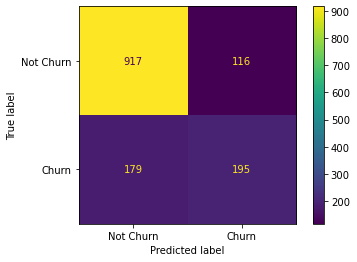

In [65]:
plot_confusion_matrix(RF_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'])

# XGBOOST

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way. 

Source : https://xgboost.readthedocs.io/en/stable/

In [68]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
])


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
])


pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

In [69]:
pipe_XGB.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                            

### Predict Training (XGB)

In [114]:
XGB_train = pipe_XGB.fit(X_train, y_train) 

In [115]:
z = XGB_train.predict(X_train)

In [116]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4130
           1       0.91      0.85      0.88      1495

    accuracy                           0.94      5625
   macro avg       0.93      0.91      0.92      5625
weighted avg       0.94      0.94      0.94      5625



### Predict Testing (XGB)

In [70]:
y_XGB = pipe_XGB.predict(X_test)

In [71]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



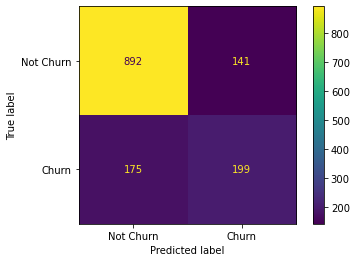

In [110]:
plot_confusion_matrix(pipe_XGB, X_test, y_test, display_labels=['Not Churn', 'Churn'])

# Hyper Parameter Tuning XGBOOST

Hyperparameter tuning is a way to optimize the model used by choosing the best parameter available. Hyperparameter identify tuple hyperparameter to obtain the most optimal model and minimize loss in the dataset. 

Hyperparameter tuning adalah nilai untuk parameter yang digunakan untuk mempengaruhi proses pembelajaran. Hyperparameter melakukan proses identifikasi tuple hyperparameters yang menghasilkan model optimal yang meminimalkan fungsi kerugian yang telah ditentukan pada data independen yang disediakan. Hyper parameter tuning pada XGBOOST digunakan untuk menentukan data yang optimal dengan menggunakan model XGBOOST dengan tujuan meminimalkan fungsi kerugian. 

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [72]:
param_XGB = {
    "algo__n_estimator" : np.arange(100, 401,100),
    "algo__max_depth" : np.arange(1,6),
    "algo__learning_rate" : np.logspace(-3, 0, 4),
    "algo__gamma" : np.logspace (-3, 2, 6),
    "algo__colsample_bytree" : [0, 3, 0.5, 0.7, 0.8],
    "algo__subsample" : [0, 3, 0.5, 0.7, 0.8],
    "algo__reg_alpha" : np.logspace(-3,3,7),
    "algo__reg_lambda" : np.logspace(-3,3,7)
}

In [73]:
GS_XGB = RandomizedSearchCV(pipe_XGB, param_XGB, cv = skf, verbose = 3, n_jobs=-1)

In [74]:
GS_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[15:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['SeniorCitizen',
                                                                                'tenure',
                                                                                'MonthlyCharges',
                                            

In [75]:
GS_XGB.best_params_

{'algo__subsample': 0.8,
 'algo__reg_lambda': 0.01,
 'algo__reg_alpha': 0.1,
 'algo__n_estimator': 200,
 'algo__max_depth': 2,
 'algo__learning_rate': 0.1,
 'algo__gamma': 1.0,
 'algo__colsample_bytree': 0.7}

In [76]:
XGB_Tuned = GS_XGB.best_estimator_

In [77]:
y_XGB_Tuned = pipe_XGB.predict(X_test)

### Classification Report XGBOOST

In [78]:
print(classification_report(y_test, y_XGB_Tuned))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



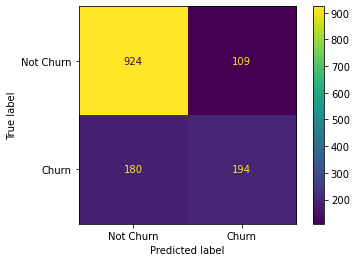

In [79]:
plot_confusion_matrix(XGB_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'])

# LOGISTIC REGRESION

Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

In [80]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
])


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
])


pipe_LogReg = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

In [81]:
pipe_LogReg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                            

### Predict Train (Logistic Regression)

In [82]:
LogReg_train = pipe_LogReg.fit(X_train, y_train) 

In [83]:
z = LogReg_train.predict(X_train)

In [84]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625



### Predict Test (Logistic Regression)

In [85]:
y_LogReg = pipe_LogReg.predict(X_test)

In [86]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



# Hyper Parameter Tuning Logistic Regression

Hyperparameter tuning is parameter value used to improve learning algorithm. Hyperparameter identify which tuple parameters will produce optimal model. To further improve our Logistic Regression model, Hyperparameter tuning will be performed.

Hyperparameter tuning adalah nilai untuk parameter yang digunakan untuk mempengaruhi proses pembelajaran. Hyperparameter melakukan proses identifikasi tuple hyperparameters yang menghasilkan model optimal yang meminimalkan fungsi kerugian yang telah ditentukan pada data independen yang disediakan. Hyper parameter tuning pada Logistic Regression digunakan untuk menentukan data yang optimal dengan menggunakan model Logistic Regression dengan tujuan meminimalkan fungsi kerugian. 

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [87]:
param_LR = {
    'algo__C' : np.logspace(-3, 3, 7),
    'algo__penalty' : ['l1', 'l2', 'lasso']
}
skf = StratifiedKFold(n_splits=4)

In [88]:
GS_logreg = GridSearchCV(pipe_LogReg, param_LR, scoring='recall', cv = skf, n_jobs=-1, verbose = True)

In [89]:
GS_logreg.fit(X_train, y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
            

In [90]:
GS_logreg.best_params_

{'algo__C': 100.0, 'algo__penalty': 'l2'}

In [91]:
LR_Tuned = GS_logreg.best_estimator_

### Classification Report Logistic Regression

In [92]:
print(classification_report(y_test, LR_Tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



# Comparation Between Model

In [95]:
base_model= [KNN_Tuned, RF_Tuned, XGB_Tuned, LR_Tuned]
model = ['KNN', 'RF', 'XGB','LogisticRegression']
data = {}

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    y_predict_proba = Model.predict_proba(X)[:,1]
    return Acc, Rec, Prec, F1

for i in range(len(base_model)):
    base_model[i].fit(X_train, y_train)
    Acc_train, Rec_train, Prec_train, F1_train = Eva_Matrix(base_model[i], X_train, y_train)
    Acc_test, Rec_test, Prec_test, F1_test = Eva_Matrix(base_model[i], X_test, y_test)
    data[f'Train {model[i]}'] = Acc_train, Rec_train, Prec_train, F1_train
    data[f'Test {model[i]}'] = Acc_test, Rec_test, Prec_test, F1_test
pd.DataFrame(data = data, index = ["Accuracy", "Recall", "Precision", "F1"]).T.sort_values('Recall', ascending=False)

[15:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Accuracy,Recall,Precision,F1
Test KNN,0.790334,0.606952,0.605333,0.606142
Train KNN,0.803022,0.589298,0.640727,0.613937
Train RF,0.846933,0.587291,0.782531,0.670997
Test LogisticRegression,0.801706,0.577540,0.640950,0.607595
Train LogisticRegression,0.803378,0.551171,0.654488,0.598402
Train XGB,0.814400,0.549164,0.689337,0.611318
Test XGB,0.794598,0.518717,0.640264,0.573117
Test RF,0.792466,0.502674,0.639456,0.562874


### Pemilihan model terbaik untuk menentukan Rekomendasi

Penggunaan 4 model (KNN , Random Forest, XGBOOST, Logistic Regression), pada pengolahan data telco churn didasarkan dari bagaimana kami ingin mencari tau model mana yang memiliki nilai persentase terbaik untuk menentukan rekomendasi. Alasan selanjutnya adalah karena keempat model tersebut merupakan model yang populer dan powerfull 

# Predict Probability

In [100]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


In [106]:
pipe_LogReg.predict_proba(X_test)

array([[0.98156015, 0.01843985],
       [0.41266348, 0.58733652],
       [0.99433152, 0.00566848],
       ...,
       [0.87285497, 0.12714503],
       [0.97191837, 0.02808163],
       [0.9948602 , 0.0051398 ]])

# RECOMENDATION